In [1]:
# retreiving the results from before (USENIX21)

In [20]:
import os
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [21]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
from datasets import GermanCredit

In [22]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [39]:
# from [testing branch] robustness_vs_utility/combined_attack_full_experiment.py
def plot(robustness_data, utility_data, data_name):
    sns.set_style('whitegrid')
    sns.set_palette('cubehelix')  # icefire, Spectral, cubehelix
    fig, axs = plt.subplots(1,2, figsize=(14,5))

    robustness_data.plot(kind='bar', stacked=False, width=0.75, ylim=(0, 1), ax=axs[0])
    plt.subplots_adjust(bottom=0.35)
    # plt.title('')
    axs[0].set_xlabel('attack configuration')
    xtick_labels = ["(0%; 10%; 10%)", '(0%; 30%; 10%)', "(10%; 10%; 10%)", '(10%; 30%; 10%)',
                    "(30%; 10%; 10%)", '(30%; 30%; 10%)', '(0%; 10%; 30%)', '(0%; 30%; 30%)', 
                    '(10%; 10%; 30%)', '(10%; 30%; 30%)', '(30%; 10%; 30%)', '(30%; 30%; 30%)']
    axs[0].set_xticklabels(xtick_labels)
    #axs[0].set_xticklabels([i for i in range(len(robustness_data))], xtick_labels, rotation=90)
    axs[0].set_ylabel('detection rate')
    axs[0].legend(title='%marks', loc='lower left')
    
    sns.set_palette('colorblind')
    utility_data.plot(kind='line', marker='o', linewidth=0.2, legend=False, ax=axs[1])
    plt.xlabel('attack configuration')
    plt.xticks([i for i in range(len(robustness_data))], xtick_labels, rotation=90)
    axs[1].set_ylabel('accuracy loss rel to initial accuracy')
    axs[1].set_yticks([5,10,15,20,25,30,35])
    axs[1].set_yticklabels(['5%','10%', '15%','20%','25%', '30%', '35%'])
    axs[1].legend(title='%marks')
    #plt.show()
    plt.savefig("combined-nursery.svg")

In [40]:
def extract_gb_robustness():
    gammae = [5,10,20,30]
    gb_results_utility = pd.DataFrame()
    gb_results_utility['attack'] = pd.read_csv("robustness_vs_utility/combined_attack/classification_nursery_5.csv")['Unnamed: 0']
    for gamma in gammae:
        temp = pd.read_csv("robustness_vs_utility/combined_attack/classification_nursery_{}.csv".format(gamma))
        gb_results_utility[gamma] = temp['gradient_boosting']
    gb_results_utility.to_csv("robustness_vs_utility/combined_attack/classification_nursery_gb.csv", 
                              index='attack')
    return gb_results_utility

In [41]:
extract_gb_robustness()

,attack,5,10,20,30
0,baseline,0.970800,0.977400,0.980500,0.981300
1,"[0.9, 0, 0.1]",0.826931,0.832558,0.835815,0.837090
2,"[0.7, 0, 0.1]",0.824708,0.828802,0.833388,0.837453
3,"[0.9, 0, 0.3]",0.653824,0.657083,0.658732,0.659331
4,"[0.7, 0, 0.3]",0.650819,0.651729,0.653312,0.655517
5,"[0.9, 1, 0.1]",0.839263,0.845350,0.848405,0.849733
6,"[0.7, 1, 0.1]",0.838654,0.843254,0.847320,0.847911
7,"[0.9, 1, 0.3]",0.673352,0.675226,0.676418,0.678003
8,"[0.7, 1, 0.3]",0.674303,0.675113,0.677004,0.679784
9,"[0.9, 3, 0.1]",0.864079,0.869246,0.873060,0.874915


In [42]:
# from [testing branch] robustness_vs_utility/combined_attack_full_experiment.py->main
results_robustness = pd.read_csv("robustness_vs_utility/combined_attack/robustness_nursery.csv",
                                     index_col='Unnamed: 0')
results_robustness = results_robustness.rename(lambda x: round(1/int(x),2), axis='columns')
results_robustness = results_robustness.drop('baseline', axis=0)
print(results_robustness)

gammae = {'german_credit': [5,10,20,30]}
# converting detection rate to fm
#for gamma in gammae['german_credit']:
#    results_robustness[str(gamma)] = results_robustness[str(gamma)].apply(lambda x: 1 - x)
#print(results_robustness)

results_utility = pd.read_csv("robustness_vs_utility/combined_attack/classification_nursery_gb.csv", 
                              index_col='attack')
results_utility = results_utility.drop('Unnamed: 0', axis=1)
results_utility = results_utility.rename(lambda x: round(1/int(x),2), axis='columns')
print(results_utility)
for col in results_utility.columns:
    results_utility[col] = 100*(results_utility[col]['baseline'] - results_utility[col]) / results_utility[col]['baseline']
results_utility = results_utility.drop('baseline', axis=0)
print(results_utility)

               0.20  0.10    0.05    0.03
[0.9, 0, 0.1]   1.0   1.0  1.0000  1.0000
[0.7, 0, 0.1]   1.0   1.0  1.0000  1.0000
[0.9, 0, 0.3]   1.0   1.0  1.0000  0.9500
[0.7, 0, 0.3]   1.0   1.0  1.0000  0.9750
[0.9, 1, 0.1]   1.0   1.0  1.0000  1.0000
[0.7, 1, 0.1]   1.0   1.0  1.0000  1.0000
[0.9, 1, 0.3]   1.0   1.0  0.9875  0.9500
[0.7, 1, 0.3]   1.0   1.0  0.9875  0.7875
[0.9, 3, 0.1]   1.0   1.0  1.0000  1.0000
[0.7, 3, 0.1]   1.0   1.0  1.0000  1.0000
[0.9, 3, 0.3]   1.0   1.0  0.9875  0.8625
[0.7, 3, 0.3]   1.0   1.0  0.8875  0.7875
                   0.20      0.10      0.05      0.03
attack                                               
baseline       0.970800  0.977400  0.980500  0.981300
[0.9, 0, 0.1]  0.826931  0.832558  0.835815  0.837090
[0.7, 0, 0.1]  0.824708  0.828802  0.833388  0.837453
[0.9, 0, 0.3]  0.653824  0.657083  0.658732  0.659331
[0.7, 0, 0.3]  0.650819  0.651729  0.653312  0.655517
[0.9, 1, 0.1]  0.839263  0.845350  0.848405  0.849733
[0.7, 1, 0.1]  0.83865

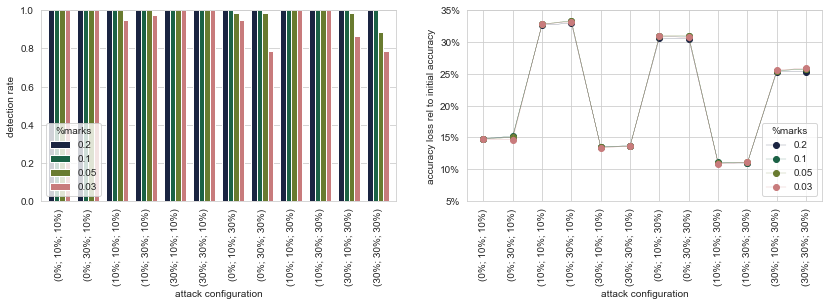

In [43]:
plot(results_robustness, results_utility, 'nursery')
# optional: include more classifiers!